In [331]:
import pandas as pd
import numpy as np 
import plotly as plt
import seaborn as sn

In [332]:
Sales_data=pd.read_csv('/home/kartheekraj/Timeseries/Deep_learning/Time_Series_Prep/DL_Prep/sales.csv', parse_dates=['date'])


In [333]:
df=Sales_data.copy()

In [334]:
df.head()

,date,store_id,cat_id,sales
0,2011-01-29,TX_1,FOODS,3950.35
1,2011-01-30,TX_1,FOODS,3844.97
2,2011-01-31,TX_1,FOODS,2888.03
3,2011-02-01,TX_1,FOODS,3631.28
4,2011-02-02,TX_1,FOODS,3072.18


In [335]:
df.tail()

,date,store_id,cat_id,sales
58225,2016-05-18,WI_3,HOUSEHOLD,2225.31
58226,2016-05-19,WI_3,HOUSEHOLD,2468.50
58227,2016-05-20,WI_3,HOUSEHOLD,3664.25
58228,2016-05-21,WI_3,HOUSEHOLD,3487.02
58229,2016-05-22,WI_3,HOUSEHOLD,3566.90


In [336]:
df.store_id.unique()

array(['TX_1', 'TX_2', 'TX_3', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [337]:
df.cat_id.unique()

array(['FOODS', 'HOBBIES', 'HOUSEHOLD'], dtype=object)

In [338]:
df.dtypes

date        datetime64[ns]
store_id            object
cat_id              object
sales              float64
dtype: object

In [339]:
pd.date_range(start='2011-01-29', end='2016-05-22')

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', length=1941, freq='D')

In [340]:
df.duplicated().any()

False

In [341]:
df.isna().sum()

date        0
store_id    0
cat_id      0
sales       0
dtype: int64

In [342]:
df.isnull().sum()

date        0
store_id    0
cat_id      0
sales       0
dtype: int64

In [343]:
Q1 = df.sales.quantile(0.25)
Q3 = df.sales.quantile(0.75)
IQR = Q3 - Q1
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR
print('high',fence_high)
print('low',fence_low)

high 9589.36
low -3606.020000000001


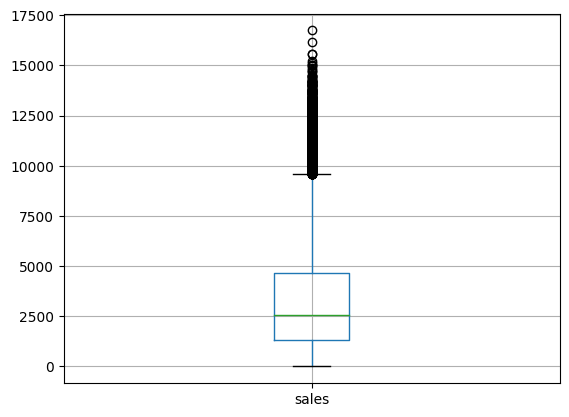

In [344]:
import matplotlib.pyplot as plt
plt.figure()
df.boxplot(column=['sales'])
plt.show()

In [345]:
df.sales[df.sales > fence_high]

1598     10036.83
6195      9683.29
6251      9969.98
6257     10122.12
6265      9692.91
           ...   
54270     9835.70
54298     9811.23
54304    10419.92
54339    10608.35
54340    11517.60
Name: sales, Length: 1455, dtype: float64

In [346]:
df.sales[df.sales > fence_high]=0

/home/kartheekraj/.pyenv/versions/3.7.13/envs/DL_prep-3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [347]:
df.sales[df.sales == 0]

330      0.0
696      0.0
1426     0.0
1598     0.0
2271     0.0
        ... 
56619    0.0
56985    0.0
57350    0.0
57715    0.0
58080    0.0
Name: sales, Length: 1580, dtype: float64

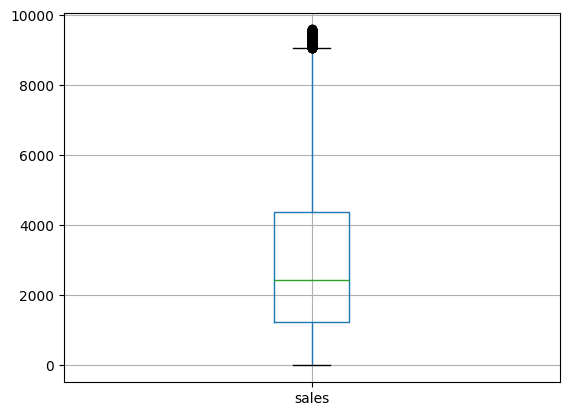

In [348]:
df.boxplot(column=['sales'])
plt.show()

In [350]:
df.sales=df.sales.interpolate(method='linear')

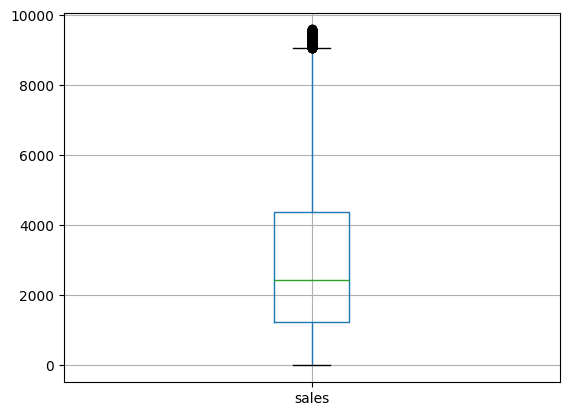

In [352]:
df.boxplot(column=['sales'])
plt.show()

In [353]:
df.to_csv('/home/kartheekraj/Timeseries/Deep_learning/Time_Series_Prep/DL_Prep/sales_processed.csv')